#### Model Free Replication of Variance

* Spanning with Options: Replicate state-contingent payoffs
    * Any twice continuously differentiable payoff g due at T can be replicated with infinite strips of European put and call options
    * This is like the Reiman Sum or Ito Calculus
    * These options span the space of continuously differentiable payoffs
    
* Log contracts
    * Contract can be replicated with infinite strips of European put and call options on the underlying
    * Every option is weighted by the square of the strike
    
* Static Replication of Realized variance and Variance Swaps
    * realized variance given in model free manner through prices of European put and call options
    * realized variance can be replicated with a log contract
    
* Constant Dollar Gamma Derivatives and Portfolio
    



In [9]:
import numpy as np
import scipy.stats as scs
import math

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set()



matplotlib.rcParams['font.family'] = 'serif'






def dollar_gamma(St, K,T,t,r, sigma):
    "Computes European Call Option Dollar Gamma"
    
    d1 = (np.log(St/K) + (r + (sigma**2)/2) * (T-t))/sigma*np.sqrt(T-t)
    
    gamma = scs.norm.pdf(d1) /(St * sigma * math.sqrt(T-t))
    return gamma * St**2


t = 0.0
T = 1.0
r = 0.01
sigma = 0.2

gammas = pd.DataFrame()

s_range = np.linspace(0.0001, 300, 300)

strike_range = range(25,226, 25)

for K in strike_range: 
    
    gammas['K=%d' % K] = dollar_gamma(s_range, K, T,t, r, sigma)



In [10]:
gammas.head()

,K=25,K=50,K=75,K=100,K=125,K=150,K=175,K=200,K=225
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.646183e-55,4.319618e-82,4.659482e-100,6.885892e-114,3.100877e-125,6.598171e-135,2.292138e-143,6.668418e-151,1.037326e-157
2,7.598337e-34,3.279164e-55,3.979835e-70,8.597166e-82,1.849616e-91,9.268901e-100,4.654377e-107,1.369289e-113,1.639569e-119
3,1.367489e-23,6.641593e-42,4.912162e-55,1.959605e-65,4.047577e-74,1.287478e-81,3.084324e-88,3.512468e-94,1.387841e-99
4,2.136752e-17,1.517272e-33,2.072453e-45,6.545164e-55,6.728355e-63,7.941687e-70,5.765060e-76,1.715241e-81,1.581006e-86


Text(0,0.5,'dollar gamma')

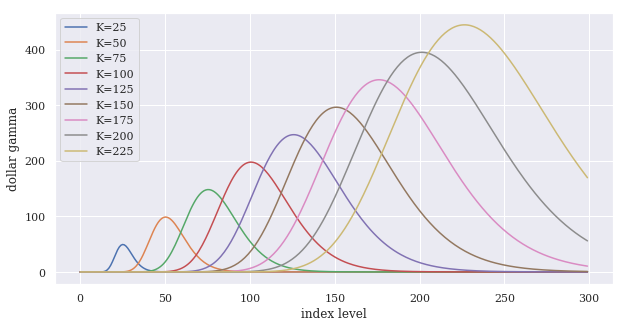

In [11]:
gammas.plot(figsize=(10,5))
plt.xlabel('index level')
plt.ylabel('dollar gamma')

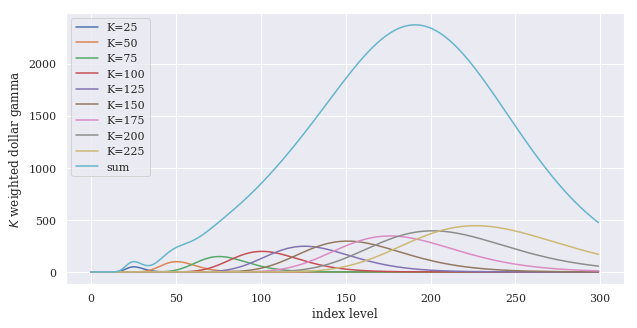

In [18]:
#dollar gamma of equally weighted options is not constant

gammas['sum'] = gammas.sum(axis=1)
gammas.plot(figsize=(10,5))
plt.xlabel('index level');
plt.ylabel('$K$ weighted dollar gamma');

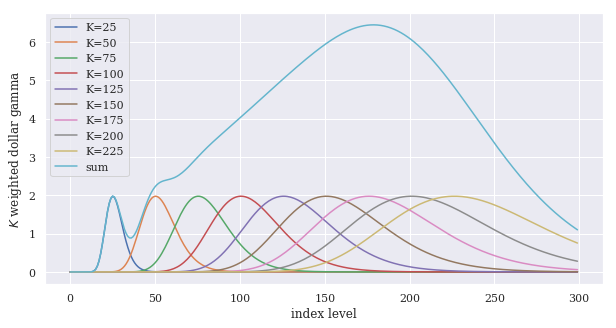

In [16]:
#Give a higher weight to higher strikes and lower weight to lower strikes 
#Divide dollar gammas by K
#Brings max dollar gamma to two for all strikes

gammas_k = pd.DataFrame()

# s_range = np.linspace(0.0001, 300, 300)

# strike_range = range(25,226, 25)

for K in strike_range: 
    
    gammas_k['K=%d' % K] = dollar_gamma(s_range, K, T,t, r, sigma)/K
    
gammas_k['sum'] = gammas_k.sum(axis=1)
gammas_k.plot(figsize=(10,5))
plt.xlabel('index level');
plt.ylabel('$K$ weighted dollar gamma');

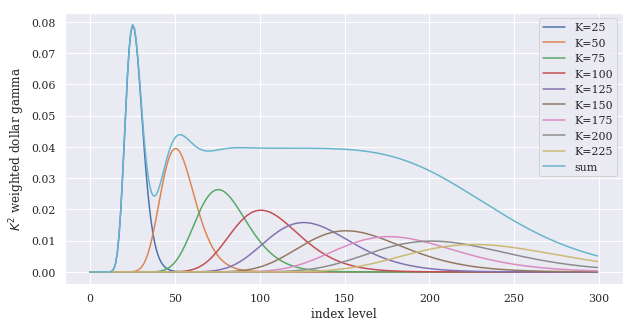

In [21]:
gammas_sq_k = pd.DataFrame()

# s_range = np.linspace(0.0001, 300, 300)

# strike_range = range(25,226, 25)

for K in strike_range: 
    
    gammas_sq_k['K=%d' % K] = dollar_gamma(s_range, K, T,t, r, sigma)/K**2
    
gammas_sq_k['sum'] = gammas_sq_k.sum(axis=1)
gammas_sq_k.plot(figsize=(10,5))
plt.xlabel('index level');
plt.ylabel('$K^2$ weighted dollar gamma');

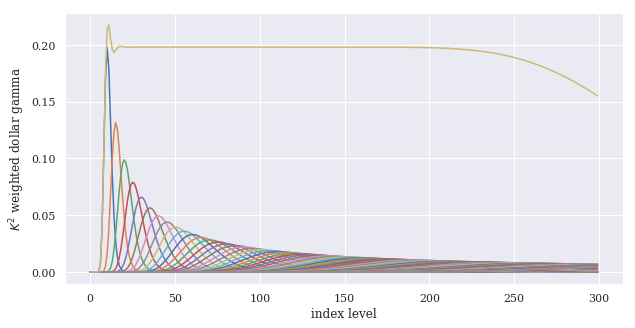

In [23]:
gammas_dense_k = pd.DataFrame()

# s_range = np.linspace(0.0001, 300, 300)

strike_range = range(10,350, 5)

for K in strike_range: 
    
    gammas_dense_k['K=%d' % K] = dollar_gamma(s_range, K, T,t, r, sigma)/K**2
    
gammas_dense_k['sum'] = gammas_dense_k.sum(axis=1)
gammas_dense_k.plot(figsize=(10,5), legend=False)
plt.xlabel('index level');
plt.ylabel('$K^2$ weighted dollar gamma');